# Final Submission

#### Student name : Rahim Njagi
#### Student pace : 23rd to 29 th July
#### Scheduled project review date/time:
#### Instructor name: Antony Muiko
#### Blog post URL :

# Analysis of films performances at the box office.

## Business Understanding

In this project, we are dealing with datasets related to films perfomances at the box office to provide insights into the types of films that are currently successful at the box office, enabling the company's new movie studio to make informed decisions on the types of films to produce.The analysis will help in identifying various factors that influence how well a movies perfoms in the box office i.e popular genre and return on investment. 



## Data Understanding

### Datasets :

1. ('tn.movie_budgets.csv')  - csv format
2. ('IMDB') -  Database 

## Data Preperation 

We first start by loading our datasets.

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('tn.movie_budgets.csv')
path = 'im.db'
conn = sqlite3.connect(path)




## Movie Budgets Data

In [3]:
#Loading the budgets dataset
df_1 = pd.read_csv('tn.movie_budgets.csv')
df_1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
#Inspecting number of rows and columns in this dataset
df_1.shape

"""
The dataset contains 5782 rows and 6 columns
"""

'\nThe dataset contains 5782 rows and 6 columns\n'

In [5]:
#Sumary of the DataFrame
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data Cleaning

In [6]:
#Checking for missing values
df_1.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [7]:
#Dropping duplicates 
df_1.drop_duplicates(inplace = True)

In [8]:
#Removing non numeric signs
df_1['production_budget'] = df_1['production_budget'].replace('[\$,]','',regex=True)
df_1['domestic_gross'] = df_1['domestic_gross'].replace('[\$,]','',regex=True)
df_1['worldwide_gross'] = df_1['worldwide_gross'].replace('[\$,]','',regex=True)


In [9]:
#Changing the numeric values to float datatype.
df_1['production_budget'] = df_1['production_budget'].astype(float)
df_1['domestic_gross'] = df_1['domestic_gross'].astype(float)
df_1['worldwide_gross'] = df_1['worldwide_gross'].astype(float)


In [10]:
#Removing records with zero in 'worldwide_gross' and 'domestic_gross'
df_1 = df_1[(df_1['worldwide_gross'] != 0) & (df_1['domestic_gross'] != 0)]

In [11]:
# Rename the movie column
df_1.rename(columns={'movie': 'movie_id'}, inplace=True)

/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_7996/3575521698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns={'movie': 'movie_id'}, inplace=True)


In [12]:
#Creating a Return On Investment column 'ROI'
df_1['ROI'] = (df_1['worldwide_gross'] + df_1['domestic_gross']) - (df_1['production_budget'])


/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_7996/4072727822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ROI'] = (df_1['worldwide_gross'] + df_1['domestic_gross']) - (df_1['production_budget'])


In [13]:
#Changing the 'release_column' column to DateTime formart.
df_1['release_date'] = pd.to_datetime(df_1['release_date'])
#Extract month from 'release_date'
df_1['release_month'] = df_1['release_date'].dt.month


/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_7996/2977763333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['release_date'] = pd.to_datetime(df_1['release_date'])
/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_7996/2977763333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['release_month'] = df_1['release_date'].dt.month


## Data Analysis

### 1. Analysis of the months Return on Investment.

In [14]:
month_roi = df_1.groupby('release_month')['ROI'].mean().reset_index()
month_roi = month_roi.sort_values(by='release_month')


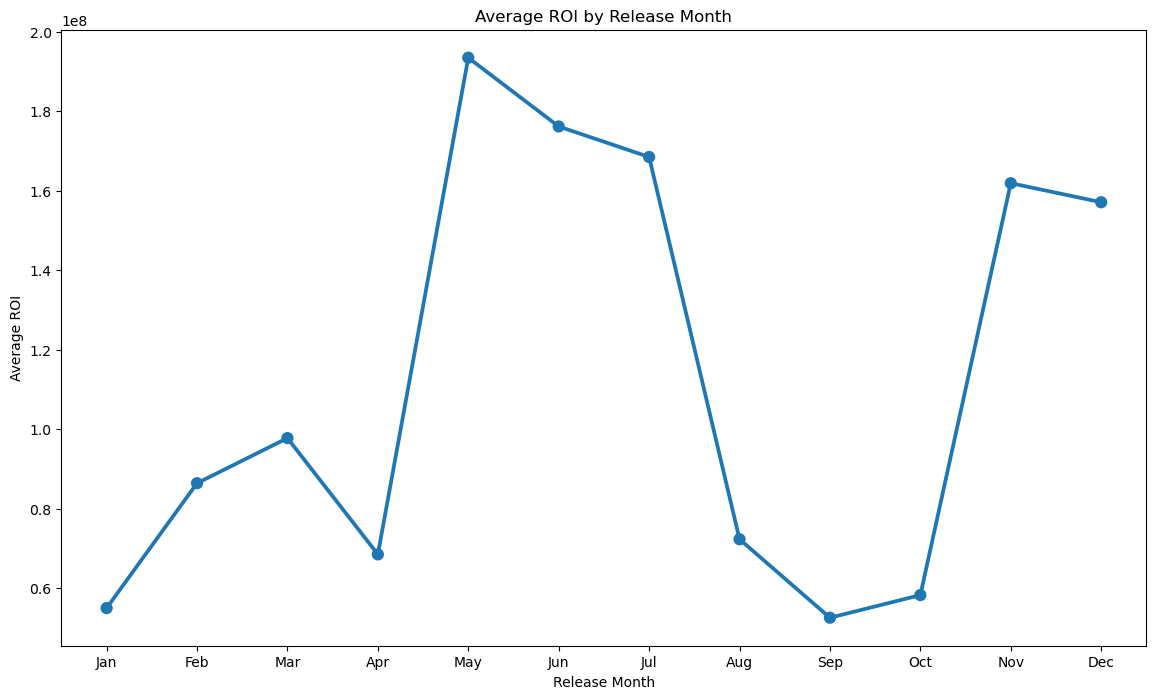

In [15]:
#Plotting the graph
plt.figure(figsize=(14, 8))
sns.pointplot(x='release_month', y='ROI', data=month_roi)
plt.title('Average ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average ROI')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## IMDB Data

In [16]:
#Writing a Query to select specific columns from tables in imdb. 
query= """
SELECT *
FROM movie_basics
JOIN movie_ratings USING(movie_id)
JOIN directors USING (movie_id)
JOIN persons USING (person_id);
"""
imdb = pd.read_sql(query, conn)

In [17]:
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


In [18]:
#Summary of the DataFrame
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   original_title      181387 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   genres              180047 non-null  object 
 6   averagerating       181387 non-null  float64
 7   numvotes            181387 non-null  int64  
 8   person_id           181387 non-null  object 
 9   primary_name        181387 non-null  object 
 10  birth_year          54805 non-null   float64
 11  death_year          1342 non-null    float64
 12  primary_profession  181262 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 18.0+ MB


### Data Cleaning

In [19]:
#Checking for missing values
imdb.isna().sum()

movie_id                   0
primary_title              0
original_title             0
start_year                 0
runtime_minutes        17803
genres                  1340
averagerating              0
numvotes                   0
person_id                  0
primary_name               0
birth_year            126582
death_year            180045
primary_profession       125
dtype: int64

In [20]:
#Dropping columns unnecessary columns
columns_to_drop = ['birth_year', 'death_year']
imdb_cleaned = imdb.dropna(subset=columns_to_drop)

In [21]:
#Filling missing values with a placeholder ('NaN') for 'genres'  & 'primary_profession' columns
imdb['genres'] = imdb['genres'].fillna('NaN')
imdb['primary_profession'] = imdb['primary_profession'].fillna('NaN')

#Filling missing values with the median for 'runtime_minutes' column.
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(imdb['runtime_minutes'].median())
 


In [22]:
#Creating a new Dataframe with selected columns
movie_df = imdb[['movie_id','runtime_minutes', 'genres','primary_name','primary_profession','averagerating','numvotes']]
movie_df 

,movie_id,runtime_minutes,genres,primary_name,primary_profession,averagerating,numvotes
0,tt0063540,175.0,"Action,Crime,Drama",Harnam Singh Rawail,"director,writer,producer",7.0,77
1,tt0063540,175.0,"Action,Crime,Drama",Harnam Singh Rawail,"director,writer,producer",7.0,77
2,tt0063540,175.0,"Action,Crime,Drama",Harnam Singh Rawail,"director,writer,producer",7.0,77
3,tt0063540,175.0,"Action,Crime,Drama",Harnam Singh Rawail,"director,writer,producer",7.0,77
4,tt0066787,114.0,"Biography,Drama",Mani Kaul,"director,writer,actor",7.2,43
...,...,...,...,...,...,...,...
181382,tt9914642,94.0,Documentary,Chris Jordan,"director,writer,editor",8.5,8
181383,tt9914642,94.0,Documentary,Chris Jordan,"director,writer,editor",8.5,8
181384,tt9914942,94.0,NaN,Laura Jou,"miscellaneous,actress,director",6.6,5
181385,tt9914942,94.0,NaN,Laura Jou,"miscellaneous,actress,director",6.6,5


In [23]:
#Summary of the DataFrame.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   runtime_minutes     181387 non-null  float64
 2   genres              181387 non-null  object 
 3   primary_name        181387 non-null  object 
 4   primary_profession  181387 non-null  object 
 5   averagerating       181387 non-null  float64
 6   numvotes            181387 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.7+ MB


In [24]:
#Converting 'genres' to string
movie_df['genres'] = movie_df['genres'].astype(str)

/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_7996/741415197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].astype(str)


In [25]:
#Inspecting the number of each type of genre.
movie_df['genres'].value_counts()

genres
Drama                         25002
Documentary                   18077
Horror                        13006
Comedy                        12723
Comedy,Drama                   5903
                              ...  
Action,Sport,Thriller             1
Action,Animation,History          1
Comedy,Documentary,Fantasy        1
Animation,Family,History          1
Documentary,Family,Sci-Fi         1
Name: count, Length: 922, dtype: int64

In [26]:
#Splitting records having commas
movie_df['genres'] = movie_df['genres'].str.split(',')
#Seperating into rows
movie_df = movie_df.explode('genres')



/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_7996/4253038581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].str.split(',')


## Data Analysis

### 1. Analysis of popularity of each genre based on number of votes

In [27]:
genre_avgvotes = movie_df.groupby('genres')['numvotes'].mean().reset_index()

genre_avgvotes = genre_avgvotes.sort_values(by='numvotes', ascending=False).head(15)

genre_avgvotes

,genres,numvotes
2,Adventure,39509.669574
0,Action,20300.501207
21,Sci-Fi,17444.270719
10,Fantasy,16580.818009
3,Animation,14812.774214
26,Western,10739.542910
6,Crime,7300.237541
24,Thriller,7176.028239
16,Mystery,7134.004799
4,Biography,6915.969966


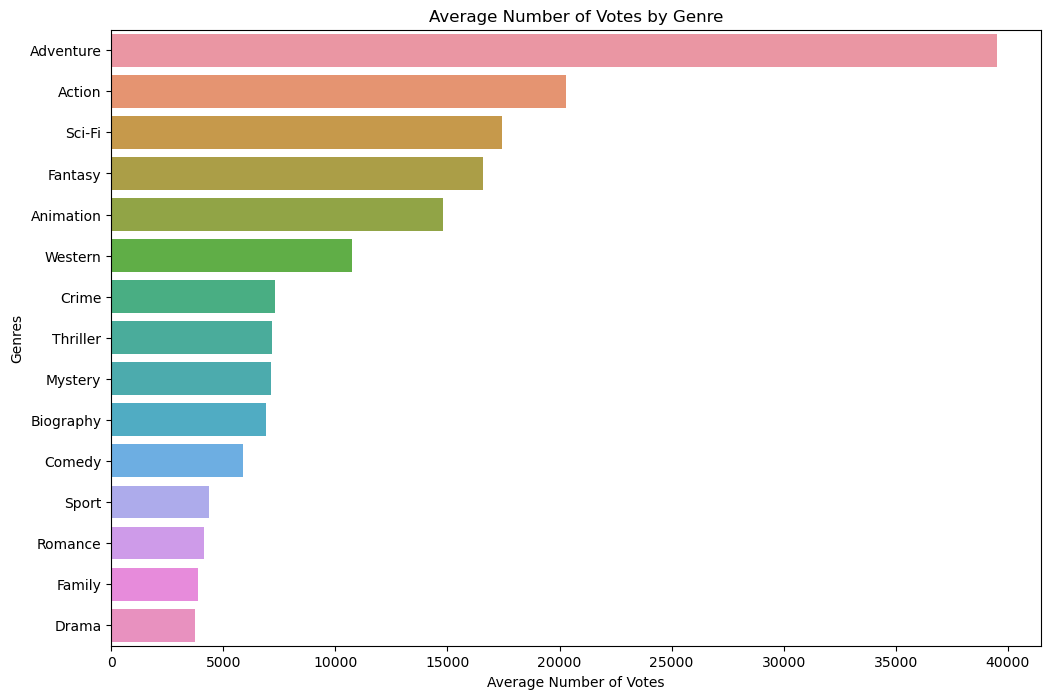

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='numvotes', y='genres', data=genre_avgvotes)
plt.title('Average Number of Votes by Genre')
plt.xlabel('Average Number of Votes')
plt.ylabel('Genres')
plt.show()

### 2. Analysis of runtime in minutes of each genre

In [29]:
genre_runtime = movie_df.groupby('genres')['runtime_minutes'].mean().reset_index()
genre_runtime = genre_runtime.sort_values(by='runtime_minutes', ascending=False).head(10)
genre_runtime

,genres,runtime_minutes
11,Game-Show,123.500000
21,Sci-Fi,112.442857
0,Action,107.923865
1,Adult,107.500000
6,Crime,104.744897
15,Musical,104.291930
20,Romance,102.698948
13,Horror,100.874483
5,Comedy,100.543271
8,Drama,98.320361


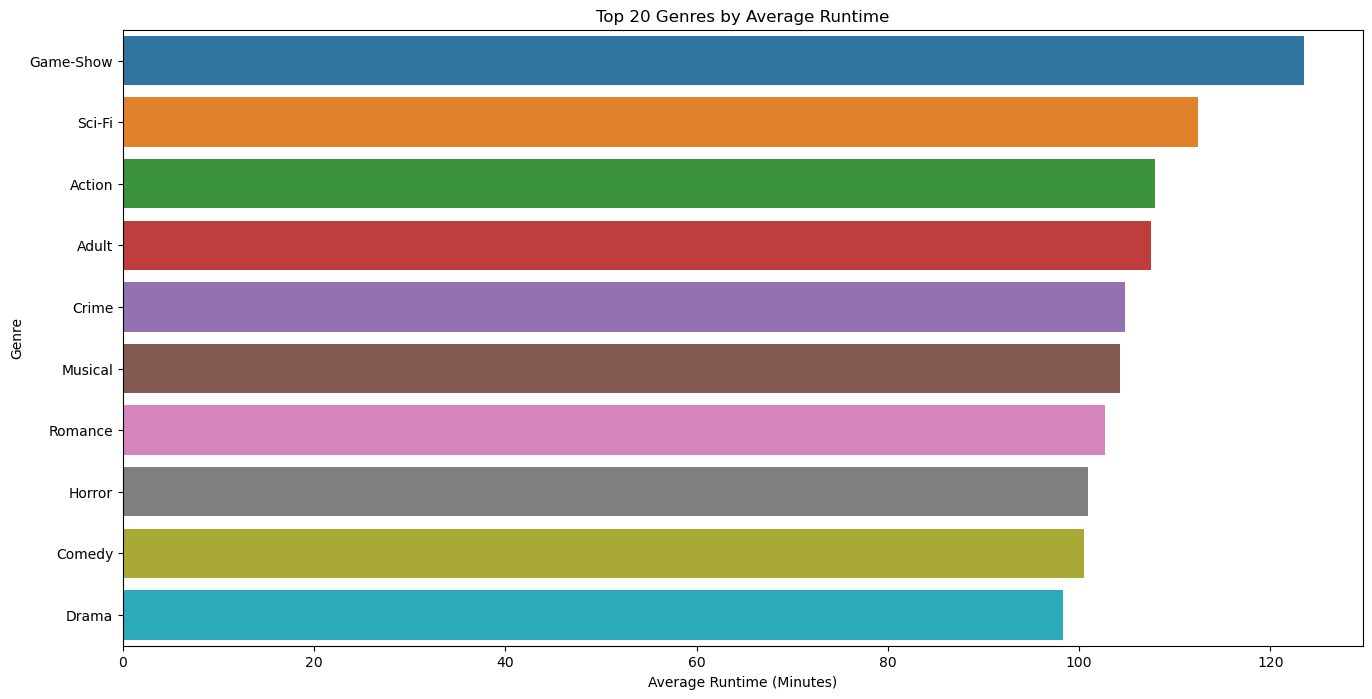

In [30]:
#Plotting the graph 
plt.figure(figsize=(16,8))
sns.barplot(x='runtime_minutes', y='genres', data=genre_runtime)
plt.title('Top 20 Genres by Average Runtime')
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Genre')

plt.show()

## Interepretation and Recommendation

1. Months between April and August recorded the highest ROI.It is recommended that the studio should release films beteween this months to achieve high Return On Investment.

2. According to the distribution, the genres which had the most number of votes were :

   Adventure,Action,Sci Fi and Fantasy.
   
The company should invest in producing movies with popular genres for good perfomance at the box office.   

3.The company should consider producing movies with short runtime as they are cheaper for production compared to longer running time which are expensive and take more time to edit.